# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [1]:
# откройте данные: ваш код здесь

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('spam_or_not_spam.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [2]:
# рассчитайте частоты для классов : ваш код здесь
labels = df.label.value_counts()
labels

label
0    2500
1     500
Name: count, dtype: int64

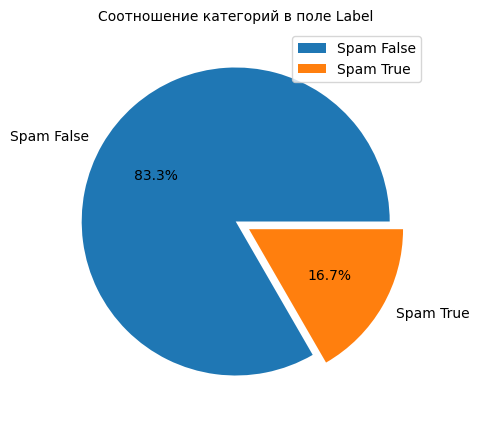

In [3]:
# визуализируйте результат: ваш код здесь

fig, axes = plt.subplots(figsize=(5, 5))
explode = (0, 0.1)
axes.pie(
    labels,
    labels=['Spam False','Spam True'],
    explode=explode,
    autopct='%1.1f%%'
)
axes.set_title('Соотношение категорий в поле Label', fontsize=10)
axes.legend()


## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [5]:
#ваш код здесь
df_clean = df.copy()

df_clean['email'] = df_clean['email'].str.replace('^\s+$', '', regex=True).str.strip()
df_clean['email'] = df_clean['email'].replace('', np.nan)
df_clean = df_clean.dropna(axis=0)

#df_clean['email'] = df_clean['email'].str.lower()
#df_clean['email'] = df_clean['email'].str.split()

Переводим данные в векторный вид:

In [6]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_clean["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [7]:
#ваш код здесь
X.shape[1]

34116

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [8]:
#ваш код здесь
y = df_clean.label

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [9]:
#ваш код здесь
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [10]:
#ваш код здесь
y_test.mean()

0.16533333333333333

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [11]:
#ваш код здесь
from sklearn.naive_bayes import ComplementNB

cnb = ComplementNB(alpha=0.01)
cnb.fit(X_train, y_train)

y_test_pred = cnb.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [12]:
#ваш код здесь
from sklearn import metrics

print(f"Accuracy: {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Recall: {metrics.recall_score(y_test, y_test_pred)}")
print(f"Precision: {metrics.precision_score(y_test, y_test_pred)}")

Accuracy: 0.988
Recall: 0.9274193548387096
Precision: 1.0


Нарисуйте ROC-кривую:

In [13]:
#ваш код здесь
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
roc_auc = metrics.auc(fpr, tpr)



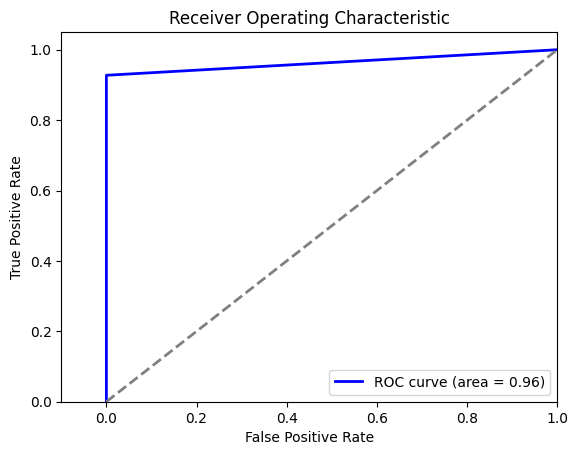

In [14]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [83]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha':np.linspace(0.000001,4,160)}

cnb = ComplementNB()

grid_search = GridSearchCV(
    estimator = cnb,
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1,verbose=2
    )

grid_search.fit(X_train,y_train)
grid_search.cv_results_.keys()

Fitting 5 folds for each of 160 candidates, totalling 800 fits


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_alpha', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [84]:
# подготовим данные для графика
alpha_param = []
for i in range(len(grid_search.cv_results_['params'])):
    alpha_param.append(list(grid_search.cv_results_['params'][i].values()))

cv_run_score0 = list(grid_search.cv_results_['split0_test_score'])
cv_run_score1 = list(grid_search.cv_results_['split1_test_score'])
cv_run_score2 = list(grid_search.cv_results_['split2_test_score'])
cv_run_score3 = list(grid_search.cv_results_['split3_test_score'])
cv_run_score4 = list(grid_search.cv_results_['split4_test_score'])

Text(0.5, 1.0, 'Зависимость Score от alpha на каждом фолде')

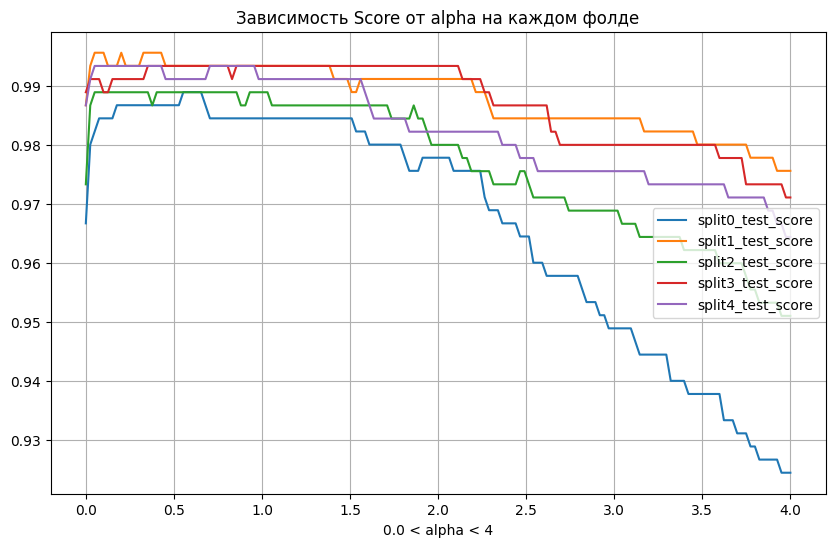

In [101]:
# построим график зависимости Score от Alpha по каждому фолду
fig, axx = plt.subplots(figsize=(10, 6))
axx.plot(alpha_param, cv_run_score0)
axx.plot(alpha_param, cv_run_score1)
axx.plot(alpha_param, cv_run_score2)
axx.plot(alpha_param, cv_run_score3)
axx.plot(alpha_param, cv_run_score4)
axx.grid('param_grid')
axx.set_xlabel('0.0 < alpha < 4')
axx.legend(['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score'], loc=7)
axx.set_title('Зависимость Score от alpha на каждом фолде')

In [110]:
# лучшее значение alpha
print('Лучшее значение alpha {}'.format(round(grid_search.best_params_['alpha'],3)
                                        ))
print('Лучшее значение score {}'.format(round(grid_search.best_score_,4)))

Лучшее значение alpha 0.352
Лучшее значение score 0.9915
